<h1><center>Understanding GFlowNets</center></h1>

In [1]:
# imports and seeding

import plot_utils as plot
from env import Env
from arch import GFlowNet


import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch
import ipywidgets as widgets
#from torch.distributions import MultivariateNormal
import gfn

seed = 7614 #GFN
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
#print(device)

<h3>What is a GFlowNet?</h3>

Short Description: What can they do, How, Advantages

<h3>Toy Environment</h3>
2-dimensional Multivariate Gaussian, set two Modes, different height?

GFN takes steps in x or y direction, reward according to mixture of gaussians.


Limitations: 
- Usually variable sequence lenght, here fixed for simplicity
- State does not depend on order of steps
- (Added counter to avoid circles in Graph)

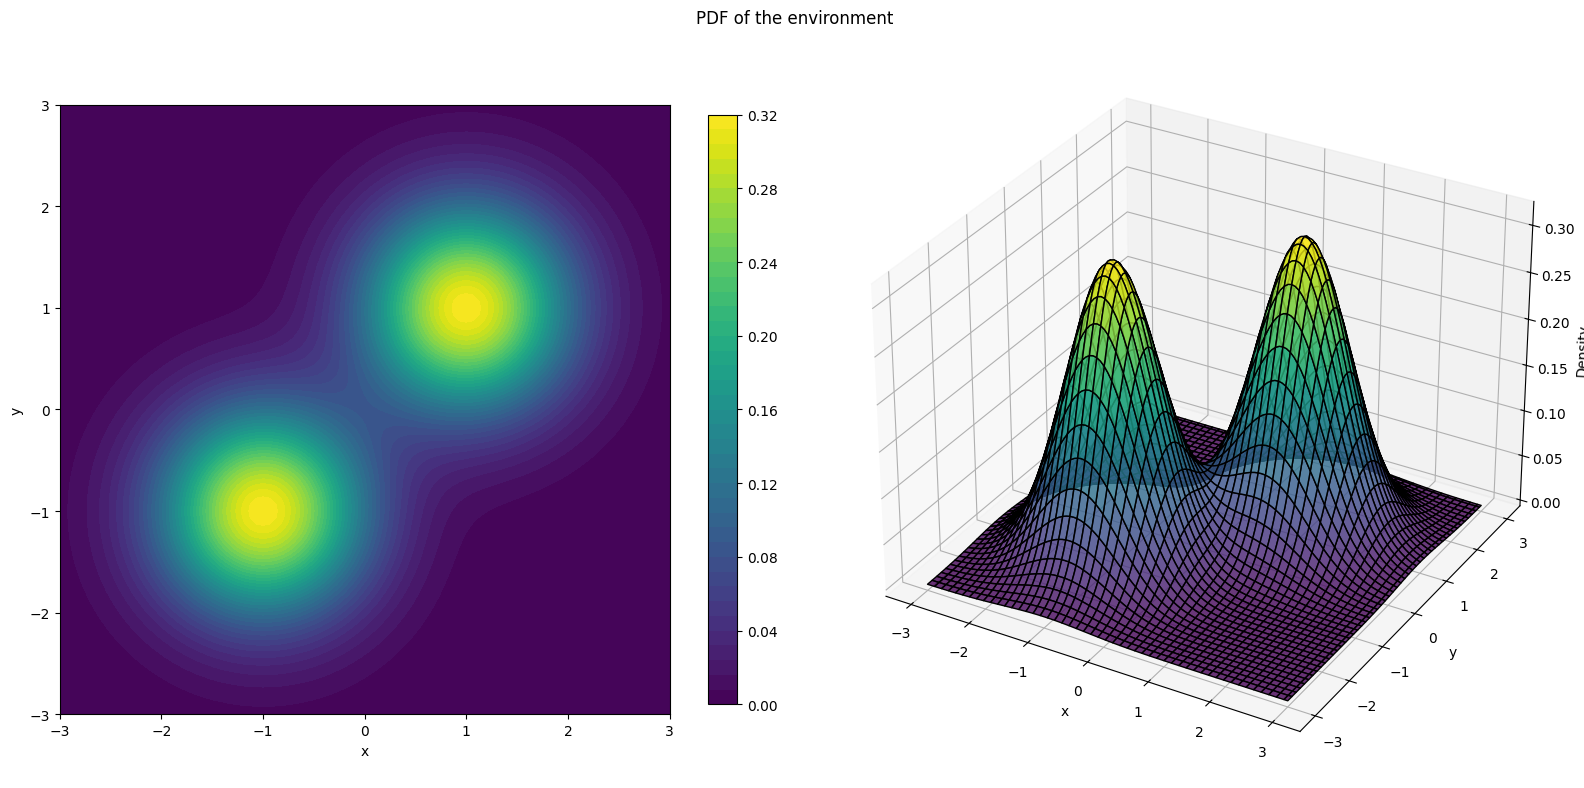

In [2]:
env = Env()
fig = plot.plot_env(env, title= "PDF of the environment")
plt.tight_layout()
plt.show()

<h3>Training</h3>

Show: GFN samples from the Underlying Distribution

Training...: 100%|█| 4000/4000 [00:54<00:00, 73.58it/s, Loss=0.099, logZ=0.607, 


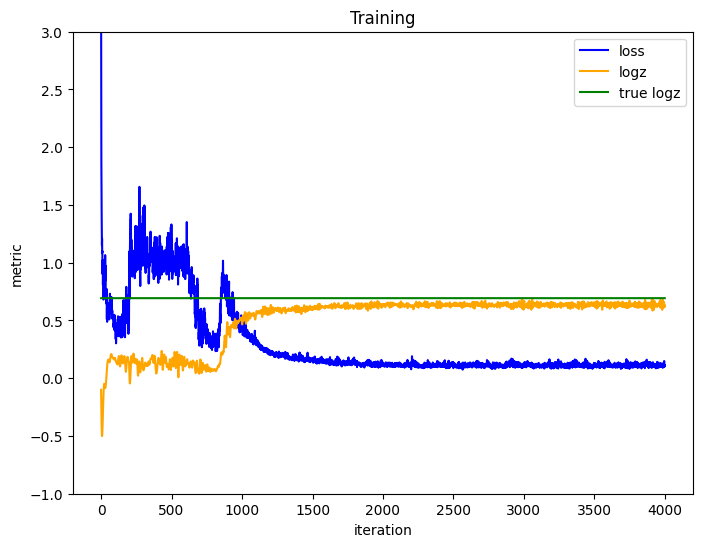

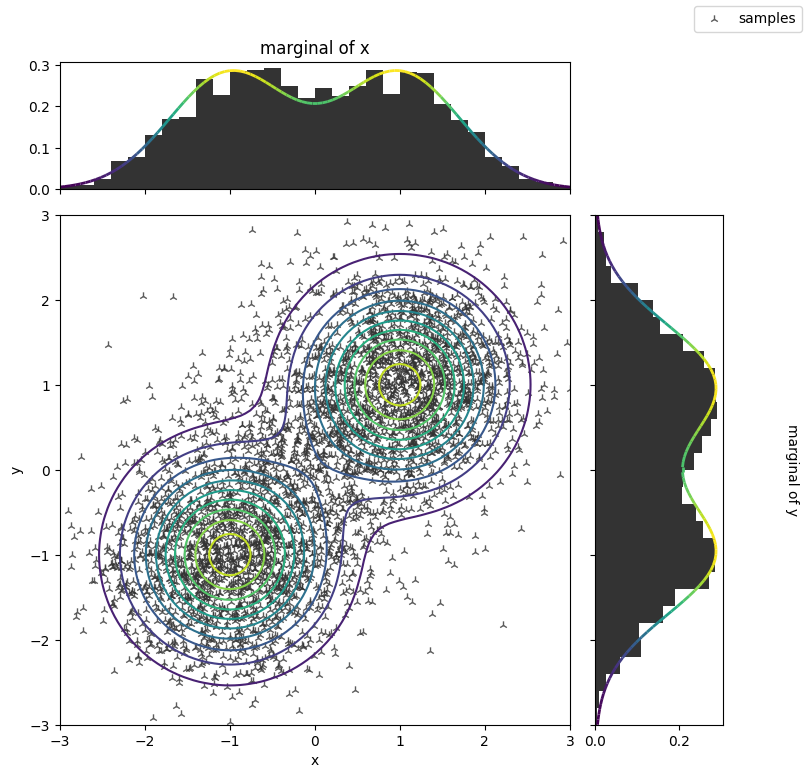

In [3]:
device="cpu"
n_inference=4000
batch_size=1024
n_iterations=4000
trajectory_length = 2

gflownet = GFlowNet(device=device)
losses, logzs, true_logz = gflownet.train(
    env,
    n_iterations=n_iterations,
    batch_size=batch_size,
    trajectory_length=2)
fig = plot.plot_losses(losses, logzs, true_logz)
plt.show()
trajectories = gflownet.inference(env, batch_size=n_inference, trajectory_length=trajectory_length)
fig = plot.plot_states_2d(env, trajectories, alpha=0.8, ground_truth="contour", colormap="viridis", levels=10)
plt.show()

<h3>Mode Collapse</h3>

Show: Problem if Modes lie apart (lower variance of environment

Training...: 100%|█| 4000/4000 [01:24<00:00, 47.23it/s, Loss=0.000, logZ=-0.001,


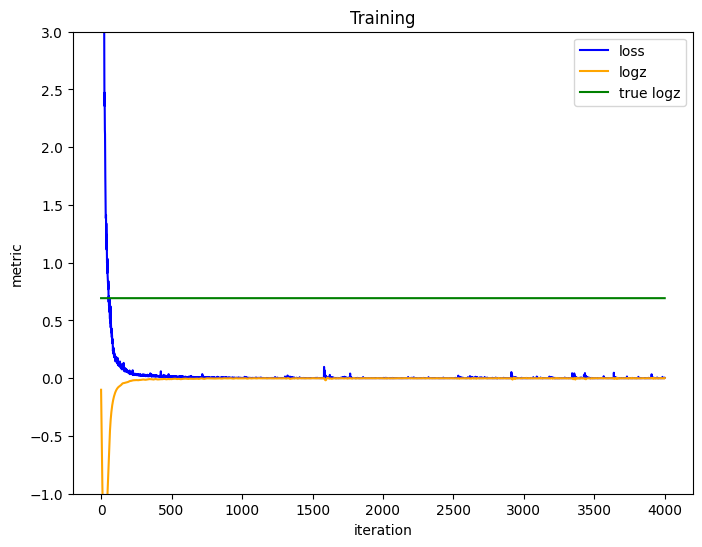

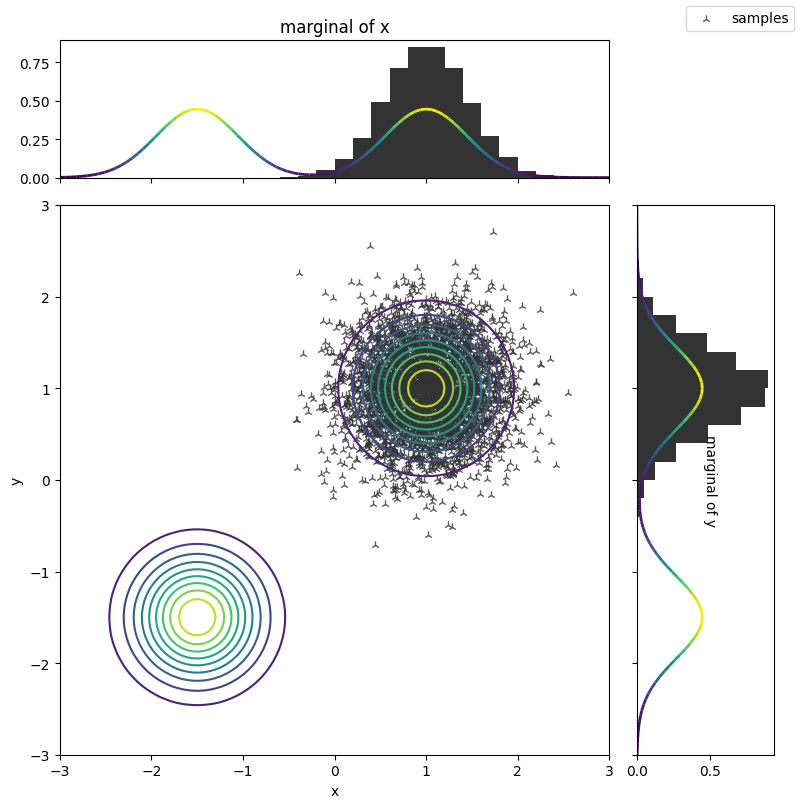

In [4]:
# hyperparams
device="cpu"
n_inference=4000
batch_size=1024
n_iterations=4000
trajectory_length = 3



env = Env(mus=[torch.tensor([1,1]), torch.tensor([-1.5,-1.5])], sigmas = [torch.ones(2)*0.2]*2,)
gflownet = GFlowNet(device=device)
losses, logzs, true_logz = gflownet.train(
    env,
    n_iterations=n_iterations,
    batch_size=batch_size,
    trajectory_length=trajectory_length,
    off_policy=None
)
fig = plot.plot_losses(losses, logzs, true_logz)
plt.show()
trajectories = gflownet.inference(env, batch_size=n_inference, trajectory_length=trajectory_length)
fig = plot.plot_states_2d(env, trajectories, alpha=0.8, ground_truth="contour", colormap="viridis", levels=10)
plt.show()

Second mode not found. Off policy training:

Training...: 100%|█| 4000/4000 [01:31<00:00, 43.89it/s, Loss=1.258, logZ=0.401, 


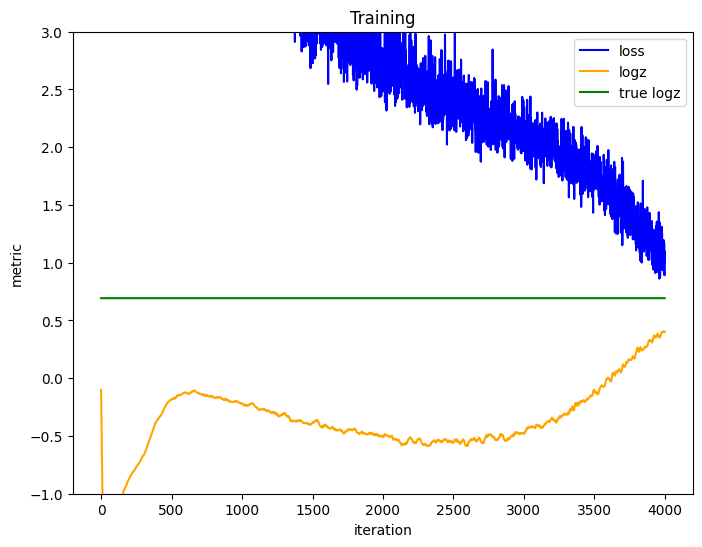

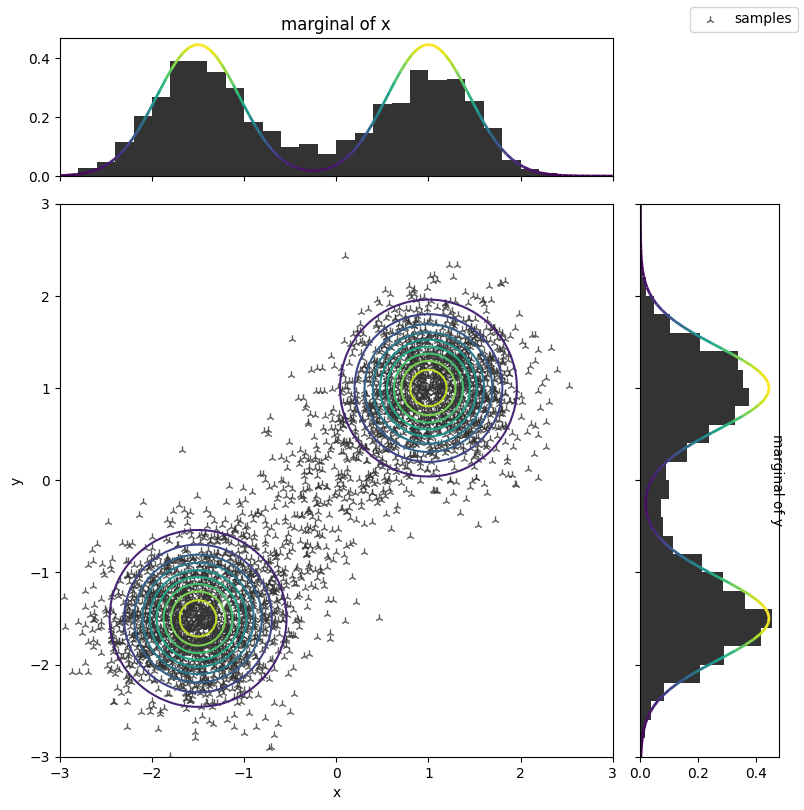

In [5]:
gflownet = GFlowNet(device=device)
losses, logzs, true_logz = gflownet.train(
    env,
    n_iterations=n_iterations,
    batch_size=batch_size,
    trajectory_length=trajectory_length,
    off_policy=2.5
)
fig = plot.plot_losses(losses, logzs, true_logz)
plt.show()
trajectories = gflownet.inference(env, batch_size=n_inference, trajectory_length=trajectory_length)
fig = plot.plot_states_2d(env, trajectories, alpha=0.8, ground_truth="contour", colormap="viridis", levels=10)
plt.show()

Model finds only one mode.
train off policy to avoid (artificially increase variance of forward policy)



<h3>Flow</h3>

Discretize Environment (4x4?) and show flow between states

<h3>Playground</h3>

Allow training with different Environment settings and hyperparameters:

Env:

- discrete/continous
- Set up to n Gaussians with mu and sigma

GFN:

- on/off policy
- Exploration noise?
- Policy std
- n iterations
- learning rate of model, Z
- loss (Flow-Matching, Trajectory-Balance etc

<h3>Bayesian interference with GFN</h3>

If time permits: additional part for Bayesian model averaging